In [129]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statistics

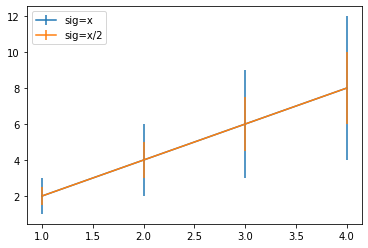

In [12]:
x=np.array([1,2,3,4])
y = 2*x
plt.errorbar(x,y,yerr=x, label='sig=x')
plt.errorbar(x,y,yerr=x/2,label='sig=x/2')
plt.legend(loc='upper left')
plt.show()

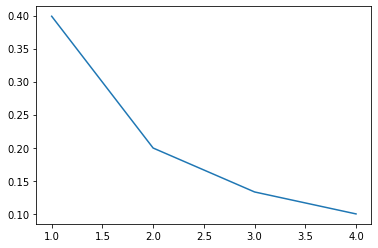

In [4]:
plt.plot(x,1/(x*np.sqrt(2*np.pi)))
#Chi2 max = dx^2/dm =0 , m=mu so L =1/sqrt(2pi*sigma)

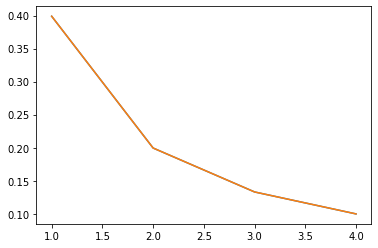

In [8]:
sig=x
L = 1/(np.sqrt(2*np.pi)*sig) * np.exp(-1/2*((y/x)-mu)**2/sig**2)
plt.plot(x,L)
plt.plot(x,1/(x*np.sqrt(2*np.pi)))
plt.show()

In [19]:
x = np.array([1,2,3,4])
y = np.array([2,4,6,8])
sig = np.array([1,2,3,4])
n = (x*y/(sig)**2)
d = (x**2/sig**2)
m = n.sum()/d.sum()
print(m)

2.0


## Frequentist Analysis 

In [59]:
#Given Data 
x = np.array([1,2,3,4])
y = np.array([2,4,6,8]) 
sig = np.array([1,2,3,4])

In [60]:
#\for i in range[0,4]:
m_hist = []
for _ in range(10000):
    y_freq = np.random.normal(y, sig)
    n_freq = (x*y_freq/(sig)**2)
    d_freq = (x**2/sig**2)
    m_freq = n_freq.sum()/d_freq.sum()
    m_hist.append(m_freq)


In [61]:
np.mean(m_hist)

2.0020671499262943

In [85]:
len(m_hist)

10000

In [86]:
np.std(m_hist)

0.4959658442541113

1.506101305672183 2.498032994180406


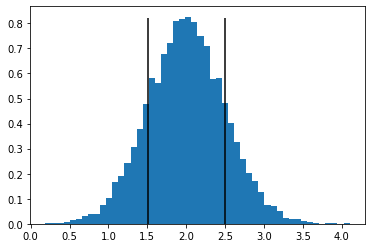

In [135]:
# sns.set()
n, bins, _ = plt.hist(m_hist, 50, density='true')
plt.vlines([np.mean(m_hist)-np.std(m_hist), np.mean(m_hist)+np.std(m_hist)], 0, 0.82)
x1 = np.mean(m_hist)-np.std(m_hist)
x2 = np.mean(m_hist)+np.std(m_hist)
#plt.fill_betweenx(m_hist, x1, x2, where= x2 >= x1, facecolor='green', alpha =0.7)
print(x1, x2)

In [138]:
confidence = 0.68
h = stats.norm.interval(confidence, loc=np.mean(m_hist), scale=statistics.stdev(m_hist))
print(h)

(1.5088253435981134, 2.4953089562544757)


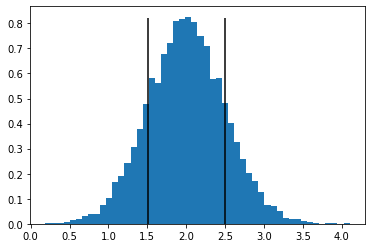

In [139]:
plt.hist(m_hist, 50, density='true')
plt.vlines(h, 0, 0.82)

In [128]:
#Likelihood =0.16/0.84
# L = 1/((2*pi)^n/2*sig) * exp(-1/2 * (yi - m*xi)**2/sigi**2)
m_1 = (y - sig*np.sqrt(np.log(1/(0.16*2*np.pi*sig))))/x
print(m_1)
np.log(0.16*2*np.pi*sig)

[nan nan nan nan]


<ipython-input-128-818be189e440>:3: RuntimeWarning: invalid value encountered in sqrt
  m_1 = (y - sig*np.sqrt(np.log(1/(0.16*2*np.pi*sig))))/x


array([0.0052956 , 0.69844278, 1.10390789, 1.39158996])

## Bayesian Analysis